!pip install scikit-learn==1.5.1

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import sklearn

In [6]:
data = pd.read_csv('HousePP\Housing.csv')

<>:1: SyntaxWarning: invalid escape sequence '\H'
<>:1: SyntaxWarning: invalid escape sequence '\H'
C:\Users\awach\AppData\Local\Temp\ipykernel_24280\27890372.py:1: SyntaxWarning: invalid escape sequence '\H'
  data = pd.read_csv('HousePP\Housing.csv')


In [7]:
print(sklearn.__version__)

1.5.1


In [8]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [9]:
data.shape

(545, 13)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [11]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [12]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [13]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


## Encode Categoriacal data

In [14]:
le = LabelEncoder()
categorical_cols = ['mainroad','guestroom','basement','hotwaterheating','airconditioning', 'parking', 'prefarea', 'furnishingstatus']
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

In [15]:
x =  data.drop('price',axis=1)
y= data['price']

In [16]:
x.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0


In [17]:
x.furnishingstatus

0      0
1      0
2      1
3      0
4      0
      ..
540    2
541    1
542    2
543    0
544    2
Name: furnishingstatus, Length: 545, dtype: int64

In [18]:
y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

In [19]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

## Feature Scaling

In [20]:
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

## Model Building

In [21]:
lr_model = LinearRegression()
lr_model.fit(xtrain,ytrain)

LinearRegression()

In [22]:
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(xtrain,ytrain)

Ridge(alpha=0.1)

In [23]:
lasso_model =  Lasso(alpha=0.1)
lasso_model.fit(xtrain,ytrain)

Lasso(alpha=0.1)

In [24]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(xtrain,ytrain)

DecisionTreeRegressor(random_state=42)

In [25]:
rf_model = RandomForestRegressor(n_estimators=100,random_state=42)
rf_model.fit(xtrain,ytrain)

RandomForestRegressor(random_state=42)

In [26]:
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(xtrain, ytrain)

GradientBoostingRegressor(random_state=42)

In [27]:
y_pred_lr = lr_model.predict(xtest)
y_pred_ridge=ridge_model.predict(xtest)
y_pred_lasso =lasso_model.predict(xtest)
y_pred_dt=dt_model.predict(xtest)
y_pred_rf =rf_model.predict(xtest)
y_pred_gb =gb_model.predict(xtest)

In [28]:
mse_lr = mean_squared_error(ytest,y_pred_lr)
mse_ridge = mean_squared_error(ytest,y_pred_ridge)
mse_lasso = mean_squared_error(ytest,y_pred_lasso)
mse_dt = mean_squared_error(ytest,y_pred_dt)
mse_rf = mean_squared_error(ytest,y_pred_rf)
mse_gb = mean_squared_error(ytest,y_pred_gb)


In [29]:
r2_lr = r2_score(ytest, y_pred_lr)
r2_ridge = r2_score(ytest, y_pred_ridge)
r2_lasso = r2_score(ytest, y_pred_lasso)
r2_dt = r2_score(ytest, y_pred_dt)
r2_rf = r2_score(ytest, y_pred_rf)
r2_gb = r2_score(ytest, y_pred_gb)

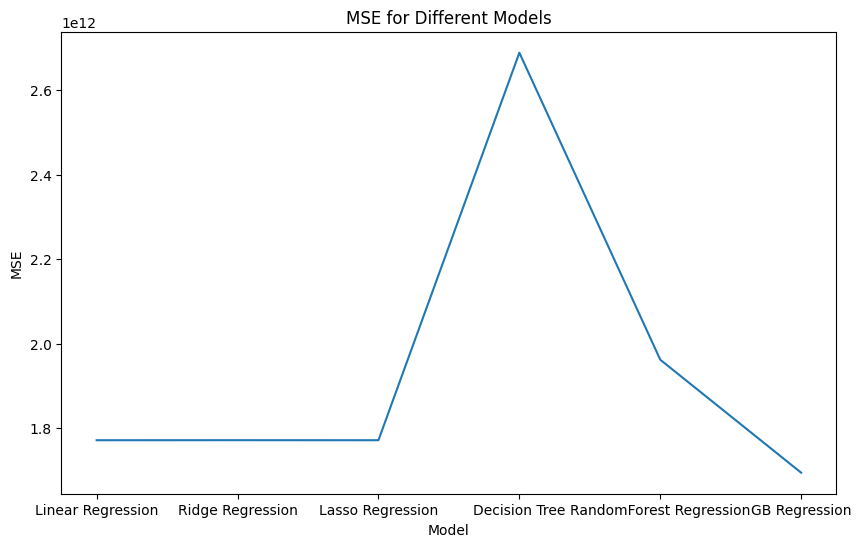

In [31]:
import matplotlib.pyplot as plt

# Assuming you have calculated MSE and RSE for each model
mse_values = {'Linear Regression': mse_lr, 'Ridge Regression': mse_ridge, 'Lasso Regression': mse_lasso,'Decision Tree': mse_dt, 'RandomForest Regression': mse_rf,'GB Regression': mse_gb}


# Plot MSE
plt.figure(figsize=(10, 6))
plt.plot(mse_values.keys(), mse_values.values())
plt.title('MSE for Different Models')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.show()



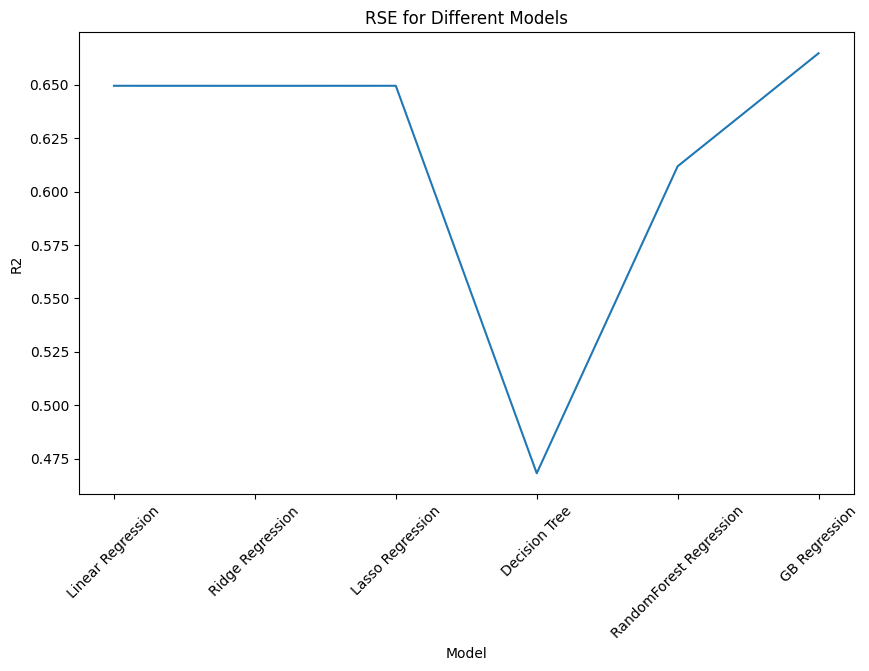

In [32]:
r2_values = {'Linear Regression': r2_lr, 'Ridge Regression': r2_ridge , 'Lasso Regression': r2_lasso,'Decision Tree': r2_dt, 'RandomForest Regression': r2_rf,'GB Regression': r2_gb}
plt.figure(figsize=(10, 6))
plt.plot(r2_values.keys(), r2_values.values())
plt.title('RSE for Different Models')
plt.xlabel('Model')
plt.ylabel('R2')
plt.xticks(rotation=45)
plt.show()

In [33]:
for key,val in mse_values.items():
    print(f"{key}: {val}")

Linear Regression: 1771751116594.0405
Ridge Regression: 1771808783138.1958
Lasso Regression: 1771751296940.0137
Decision Tree: 2688177649082.569
RandomForest Regression: 1962144940711.022
GB Regression: 1694870370248.4102


In [34]:
min_mse = min(mse_values.values())
min_mse

np.float64(1694870370248.4102)

In [35]:
for key,val in r2_values.items():
    print(f"{key}: {val}")

Linear Regression: 0.6494754192267793
Ridge Regression: 0.6494640104340739
Lasso Regression: 0.6494753835469955
Decision Tree: 0.4681689010023007
RandomForest Regression: 0.6118077610803518
GB Regression: 0.6646855642239725


In [36]:
min_r2 = min(r2_values.values())
min_r2

0.4681689010023007

In [ ]:
x.shape

(545, 12)

In [ ]:
test = [2500,3,2,7,0,0,0,1,1,1,1,1]

In [ ]:
len(test)

12

In [ ]:
test =[test]

In [ ]:
test = scaler.transform(test)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
ypred = gb_model.predict(test)

In [ ]:
ypred[0]

4944566.441306221

In [37]:
import joblib

In [38]:
joblib.dump(lr_model,'price_pred4.pkl')

['price_pred4.pkl']

In [39]:
joblib.dump(scaler,'scaler4.pkl')

['scaler4.pkl']

In [ ]:
#joblib.dump(le,'label_enc.pkl')